# Transmission line

Coursera: TU/e's Microwave and Antenna Engineering


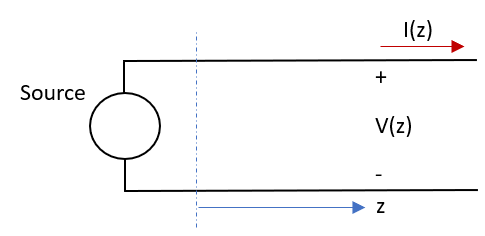

To determine voltage at any point along the transmission line $V(z)$, we can use TEM (transient electro- magnetic).

Alternatively, we can apply Kirchhoff's law.

Note that Kirchhoff's law is applicable only when the signal period $\lambda$ is much longer than the transmission line.

The trick is instead of modelling the entire transmission line circuit at once,
a short piece of of length $\Delta z$ ($<< \lambda$)
and can be modelled as a lumped-element circuit.

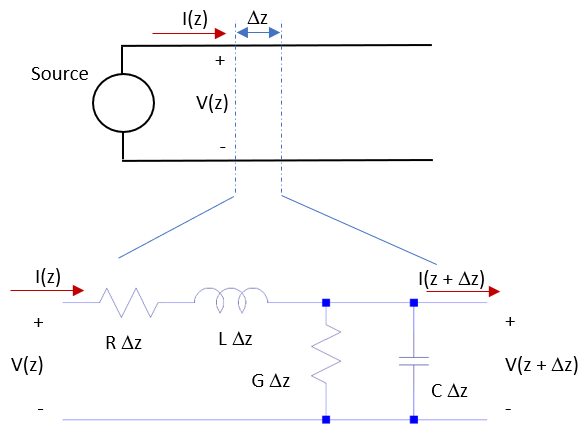

KVL:
$V(z) - I(z) \cdot R \Delta z - I(z) \cdot j \omega L \Delta z - v(z + \Delta z) = 0$

KCL: $I(z) - V(z + \Delta z) G \Delta z - V(z + \Delta z) j \omega C \Delta z - I(z + \Delta z) = 0$

"Telegrapher equations"

Divide by $\Delta z$ and take limit $\Delta z$ to $0$.

Note

* $\lim_{\Delta z \rightarrow 0} \frac{V(z + \Delta z) - V(z)}{\Delta z} = \frac{\partial V(z)}{\partial z}$

Hence,
\begin{align}
\frac{\partial V(z)}{\partial z} &=& - (R + j \omega L) \cdot I(z)
\\
\frac{\partial I(z)}{\partial z} &=& - (G + j \omega C) \cdot V(z)
\end{align}

The solution is in the format:
\begin{align}
V(z) &=& V_o^+ e^{- \gamma z} + V_o^- e^{\gamma z}
\\
I(z) &=& I_o^+ e^{- \gamma z} + I_o^- e^{\gamma z}
\end{align}


In [1]:
from matplotlib import pyplot as plt
import numpy as np

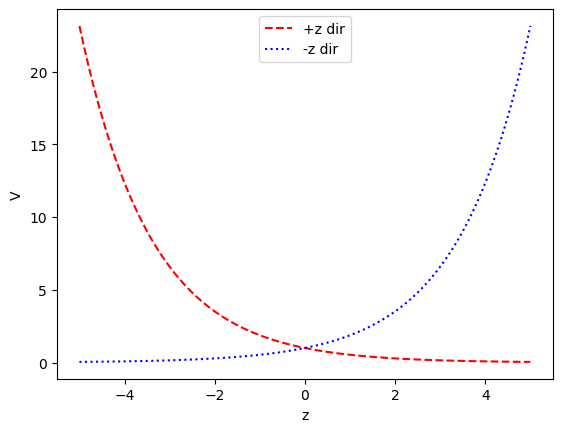

In [2]:
zs = np.linspace(-5, 5, 500)

gamma = 0.2*np.pi

plt.plot(zs, np.exp(-gamma*zs).real, 'r--')
plt.plot(zs, np.exp(gamma*zs).real, 'b:')

plt.xlabel('z')
plt.ylabel('V')

plt.legend(['+z dir', '-z dir'])

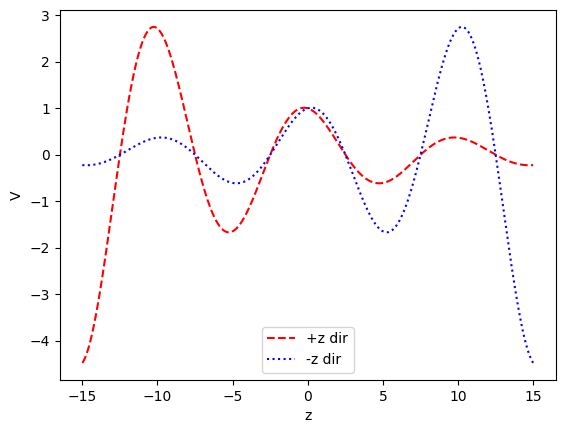

In [3]:
zs = np.linspace(-15, 15, 500)

gamma = 0.1 + 0.2*np.pi*1j

plt.plot(zs, np.exp(-gamma*zs).real, 'r--')
plt.plot(zs, np.exp(gamma*zs).real, 'b:')

plt.xlabel('z')
plt.ylabel('V')

plt.legend(['+z dir', '-z dir'])

In [4]:
zs[:].shape

(500,)

In [ ]:
N = 500
zx = 15
zs = np.linspace(-zx, zx, N)

gamma = 0.1 + 0.2*np.pi*1j
Vp = 1
Vn = 0.8

plt.plot(zs[int(N/2):], Vp*np.exp(-gamma*zs[int(N/2):]).real, 'r--')
plt.plot(zs[:int(N/2)], Vn*np.exp(gamma*zs[:int(N/2)]).real, 'b:')

plt.xlabel('z')
plt.ylabel('V')

plt.legend(['+z dir', '-z dir'])

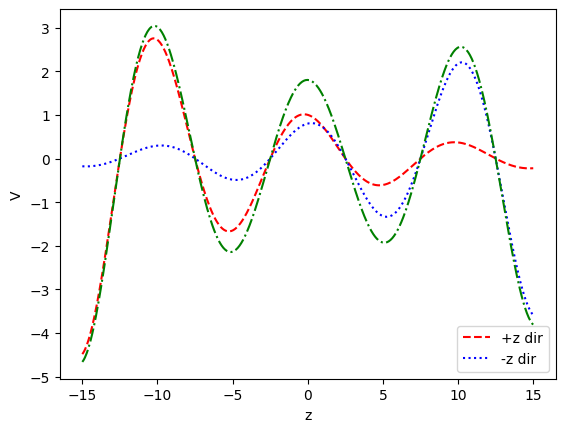

In [6]:
N = 500
zx = 15
zs = np.linspace(-zx, zx, N)

gamma = 0.1 + 0.2*np.pi*1j
Vp = 1
Vn = 0.8

Vt = Vp*np.exp(-gamma*zs).real + Vn*np.exp(gamma*zs).real

plt.plot(zs, Vp*np.exp(-gamma*zs).real, 'r--')
plt.plot(zs, Vn*np.exp(gamma*zs).real, 'b:')
plt.plot(zs, Vt, 'g-.')

plt.xlabel('z')
plt.ylabel('V')

plt.legend(['+z dir', '-z dir'])

$\gamma = \alpha + j \beta = \sqrt{(R + j \omega L) (G + j \omega C)}$ .



Characteristic impedance of a transmission line

$z_o = \frac{V_o^+}{I_o^+} = \frac{R + j \omega L}{\gamma}$

# Transmission line (another version)

[Intro to Transmission Line Theory, Kathryn Leigh Smith, Assistant Professor, UNC-Charlotte](https://www.youtube.com/watch?v=ZeJsStQkXXk)

* Check out https://www.ansys.com/courses

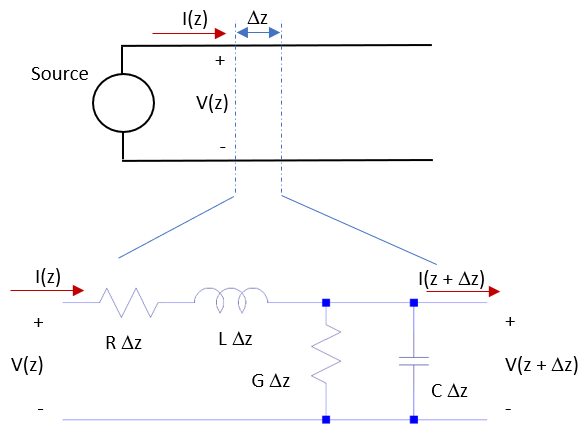

The Telegrapher's Equations

\begin{align}
\frac{d V(z,t)}{d z} + L \frac{d I(z,t)}{d t} + R I(z,t) &=& 0
\\
\frac{d I(z,t)}{d z} + C \frac{d V(z,t)}{d t} + G V(z,t) &=& 0
\end{align}

The 2nd Telegrapher's equation can be arranged to

$\frac{d I(z,t)}{d z} = - C \frac{d V(z,t)}{d t} - G V(z,t)$

From the Telegrapher's equations, we can get the 2nd derivative:

\begin{align}
\frac{d^2 V(z,t)}{d z^2} &=& - L \frac{d^2 I(z,t)}{d t d z} - R \frac{d I(z,t)}{d z}
\\
\frac{d^2 I(z,t)}{d t d z} &=& - C \frac{d^2 V(z,t)}{d t^2} - G \frac{d V(z,t)}{d t}
\end{align}

Substitute $\frac{d^2 I(z,t)}{dt dz}$ and $\frac{d I(z, t)}{d z}$ into the 2nd derivative voltage equation, we get the "Voltage Wave Equation".

$\frac{d^2 V(z,t)}{d z^2} = L C \frac{d^2 V(z, t)}{d t^2} + (L G + RC) \frac{d V(z,t)}{d t} + R G \cdot V(z, t)$

Similarly, we can get the "Current Wave Equation".

$\frac{d^2 I(z,t)}{d z^2} = L C \frac{d^2 I(z, t)}{d t^2} + (L G + RC) \frac{d I(z,t)}{d t} + R G \cdot I(z, t)$

## Solutions to the Voltage and Current Wave Equations

We assume that both voltage and current are time-harmonic.

\begin{align}
V(z,t) &=& V(z) \cdot e^{j \omega t}
\\
I(z,t) &=& I(z) \cdot e^{j \omega t}
\end{align}

Rewrite the Wave Equations.

\begin{align}
\frac{d^2 V(z)}{d z^2} e^{j \omega t} = - \omega^2 L C V(z) e^{j \omega t}  + j \omega (L G + RC) V(z) e^{j \omega t} + R G \cdot V(z) e^{j \omega t}
\\
\frac{d^2 I(z)}{d z^2} e^{j \omega t} = - \omega^2 L C I(z) e^{j \omega t} + j \omega (L G + RC) I(z) e^{j \omega t} + R G \cdot I(z) e^{j \omega t}
\end{align}

Cancel $e^{j \omega t}$ on both sides,

\begin{align}
\frac{d^2 V(z)}{d z^2} = - \omega^2 L C V(z)  + j \omega (L G + RC) V(z) + R G \cdot V(z)
\\
\frac{d^2 I(z)}{d z^2} = - \omega^2 L C I(z) + j \omega (L G + RC) I(z) + R G \cdot I(z)
\end{align}

Re-organize to
\begin{align}
\frac{d^2 V(z)}{d z^2} = V(z) \cdot (j \omega (L G + RC) + R G - \omega^2 L C)  
\\
\frac{d^2 I(z)}{d z^2} = I(z) \cdot (j \omega (L G + RC) + R G - \omega^2 L C)
\end{align}


Denote
$\gamma^2 \equiv R G + j \omega (L G + R C) - \omega^2 L C$.

* $\gamma^2 = R G - \omega^2 L C + j \omega (L G + R C)$

* $\gamma$ is called "the complex propagation constant".

* $\gamma = \alpha + j \beta$.
  * $\alpha$ : the attenuation constant.
  * $\beta$ : the lossless propagation constant.


Notice $\gamma$ depends on transmission line and frequency ($\omega$). It does not depend on the load $Z_L$.

Lossless ($R = G = 0$)

$\gamma^2 = - \omega^2 L C$
or $\omega = j \omega \sqrt{L C}$ ($ \Rightarrow \alpha = 0$)

We have

\begin{align}
\frac{d^2 V(z)}{d z^2} &=& \gamma^2 V(z)
\\
\frac{d^2 I(z)}{d z^2} &=& \gamma^2 I(z)
\end{align}

Recall

The 2nd-order differential equation
$a_2 \frac{d^2 x}{d t^2} + a_1 \frac{d x}{d t} + a_0 x = f(t)$
has its solution:
* $x(t) = x_h(t) + x_b(t)$
* Hence, $a_2 = 1$, $a_1 = 0$, $a_0 = - \gamma$ and $f(t) = 0$.
* Since $f(t) = 0$ then $x_b(t) = B$.
  * $\frac{d^2 B}{d t^2} - \gamma^2 B = 0$
  * $B = 0$ $\Rightarrow$ $x_b(t) = 0$.
* When $a_1^2 > 4 a_2 a_0$,
  * $x_h(t) = A_1 e^{s_1 t} + A_2 e^{s_2 t}$ where
    * $s_1, s_2 = \frac{-a_1 \pm \sqrt{a_1^2 - 4 a_2 a_0}}{2 a_2}$
    * Hence,
      $s_1 = \frac{-\sqrt{-4 (1) (-\gamma^2)}}{2} = - \gamma$
      $s_2 = \gamma$

* Therefore, the solutions to
\begin{align}
\frac{d^2 V(z)}{d z^2} &=& \gamma^2 V(z)
\\
\frac{d^2 I(z)}{d z^2} &=& \gamma^2 I(z)
\end{align}
are
\begin{align}
V(z) &=& V_0^+ e^{-\gamma z} + V_0^- e^{\gamma z}
\\
I(z) &=& I_0^+ e^{-\gamma z} + I_0^- e^{\gamma z}
\end{align}

and

\begin{align}
V(z, t) &=& V_0^+ e^{-\gamma z} e^{j \omega t} + V_0^- e^{\gamma z} e^{j \omega t}
\\
I(z, t) &=& I_0^+ e^{-\gamma z} e^{j \omega t} + I_0^- e^{\gamma z} e^{j \omega t}
\end{align}






In time-domain form (Recall $\gamma = \alpha + j \beta$),

\begin{align}
V(z, t) &=& Re\{ V_0^+ e^{-\alpha z} e^{j \omega t - j \beta z} + V_0^- e^{\alpha z} e^{j \omega t + j \beta z} \}
\\
I(z, t) &=& Re\{ I_0^+ e^{-\alpha z} e^{j \omega t - j \beta z} + I_0^- e^{\alpha z} e^{j \omega t + j \beta z} \}
\end{align}

Or
\begin{align}
V(z, t) &=& V_0^+ e^{-\alpha z} \cos( \omega t - \beta z) + V_0^- e^{\alpha z} \cos( \omega t + \beta z )
\\
I(z, t) &=& I_0^+ e^{-\alpha z} \cos( \omega t - \beta z) + I_0^- e^{\alpha z} \cos( \omega t + \beta z )
\end{align}


To solve for $V_0^+$, $V_0^-$, $I_0^+$, and $I_0^-$,
we need initial conditions, e.g., $V(0,0)$, $V(\ell,0)$, $I(0,0)$, $I(\ell,0)$.


## Example



## Code ```calc_gamma```

In [7]:
def calc_gamma(R, G, L, C, f):
    '''
    \gamma^2 = R G - \omega^2 L C + j \omega (L G + R C)
    '''

    w = 2 * np.pi * f
    g2 = R * G - w**2 * L * C + 1j * w * (L * G + R * C)

    return np.sqrt(g2)

In [8]:
R = 2               # ohm/m
G = 0.5e-3          # siemen/m
L = 14e-3           # H/m
C = 3.2e-9          # C/m
f = 4.8e6           # Hz

gamma = calc_gamma(R, G, L, C, f)

gamma

(0.5233888552202206+201.8652514916093j)

In [9]:
alpha = gamma.real
beta = gamma.imag

w = 2 * np.pi * f
print(alpha)
print(beta)
print('omega=', w)

0.5233888552202206
201.8652514916093
omega= 30159289.474462014


## Code V(z, t)

In [10]:
def Vzt(z, t, w, a, b, Vop, Von):
    V = Vop * np.exp(-a * z) * np.cos(w * t - b * z) + \
        Von * np.exp(a * z) * np.cos(w * t + b * z)

    return V

In [11]:
Vzt(0, 0, w, alpha, beta, 0.1, 0.1)

0.2

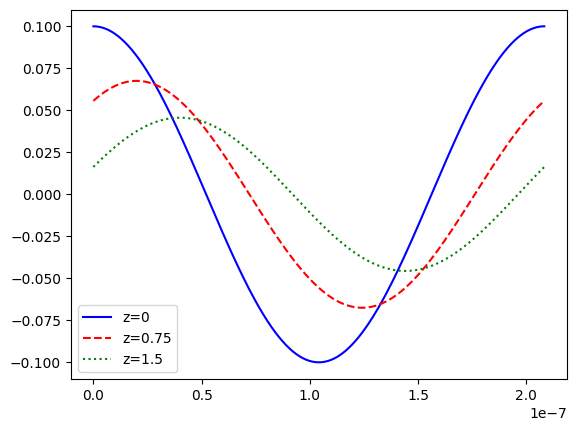

In [12]:
ts = np.linspace(0, 1/f, 500)
plt.plot(ts, Vzt(0, ts, w, alpha, beta, 0.1, 0), 'b')
plt.plot(ts, Vzt(0.75, ts, w, alpha, beta, 0.1, 0), 'r--')
plt.plot(ts, Vzt(1.5, ts, w, alpha, beta, 0.1, 0), 'g:')
plt.legend(['z=0', 'z=0.75', 'z=1.5'])

### Source-terminal voltage

Recall that

* $V(z=0, t)$ is the voltage at the source terminals.

* The Telegrapher's equations have  this source-terminal voltage in the left-hand side.

* Hence the source-terminal voltage

\begin{align}
V(z=0, t) &= V_0^+ \cos( \omega t) + V_0^- \cos( \omega t)
\\
&= (V_0^+ + V_0^-) \cos( \omega t)
\end{align}

Notice that the source-terminal voltage $V(z=0, t)$ has both $V_0^+ + V_0^-$.


It contains both the source-supplied voltage, $V_0^+$ and the reflected-back voltage $V_0^-$.

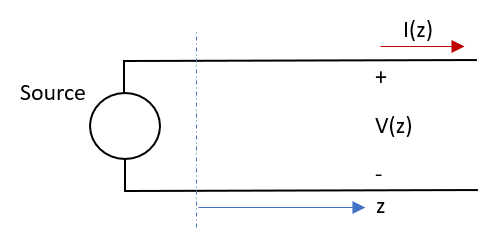

Initial conditions

E.g., Voltages at the source terminals and on transmission line, $V(z=0, t=0)$ and $V(z=1, t=0)$

\begin{align}
V(0, 0) &=& V_0^+ + V_0^-
\\
V(1, 0) &=& V_0^+ e^{-\alpha} \cos(-\beta) + V_0^- e^{\alpha} \cos(\beta)
\end{align}

Or
$
\begin{bmatrix}
V(0,0)
\\
V(1,0)
\end{bmatrix}
=
\begin{bmatrix}
1 & 1
\\
e^{- \alpha} \cos(-\beta) & e^{\alpha} \cos(\beta)
\end{bmatrix}
\cdot
\begin{bmatrix}
V_0^+
\\
V_0^-
\end{bmatrix}
$

In [13]:
# Initial conditions
# V(0, 0)
# V(1, 0)

V00 = 5
V10 = 1

bv = np.array([[V00], [V10]])
Am = np.array([[1, 1],[np.exp(-alpha)*np.cos(-beta), np.exp(alpha)*np.cos(beta)]])

C0 = np.linalg.solve(Am, bv)

In [14]:
C0

array([[ 6.3899277],
       [-1.3899277]])

In [15]:
Vop = C0[0,0]
Von = C0[1,0]

Text(0.5, 0, 'Time')

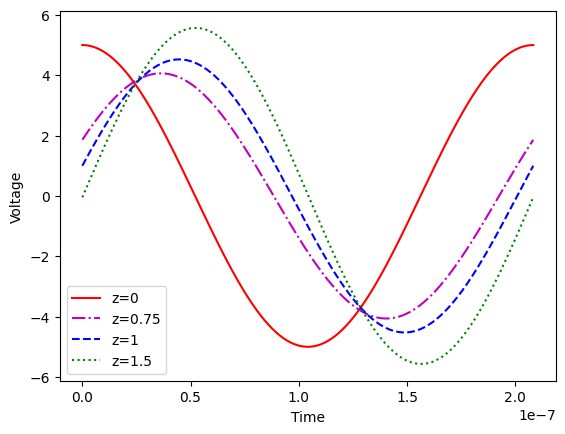

In [16]:
ts = np.linspace(0, 1/f, 500)
plt.plot(ts, Vzt(0, ts, w, alpha, beta, Vop, Von), 'r')
plt.plot(ts, Vzt(0.75, ts, w, alpha, beta, Vop, Von), 'm-.')
plt.plot(ts, Vzt(1, ts, w, alpha, beta, Vop, Von), 'b--')
plt.plot(ts, Vzt(1.5, ts, w, alpha, beta, Vop, Von), 'g:')
plt.legend(['z=0', 'z=0.75', 'z=1', 'z=1.5'])

plt.ylabel('Voltage')
plt.xlabel('Time')

Text(0.5, 0, 'Length')

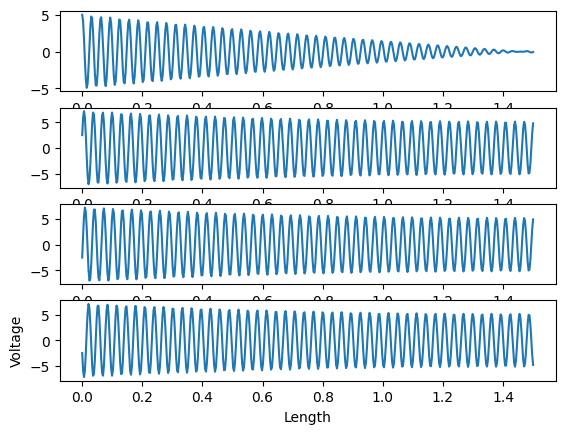

In [17]:
tau = 1/f

zs = np.linspace(0, 1.5, 500)

plt.subplot(4,1,1)
plt.plot(zs, Vzt(zs, 0, w, alpha, beta, Vop, Von))
plt.subplot(4,1,2)
plt.plot(zs, Vzt(zs, tau/6, w, alpha, beta, Vop, Von))
plt.subplot(4,1,3)
plt.plot(zs, Vzt(zs, tau/3, w, alpha, beta, Vop, Von))
plt.subplot(4,1,4)
plt.plot(zs, Vzt(zs, tau*2/3, w, alpha, beta, Vop, Von))
# plt.plot(ts, Vzt(zs, tau, w, alpha, beta, Vop, Von))

plt.ylabel('Voltage')
plt.xlabel('Length')

Text(0.5, 0, 'Length')

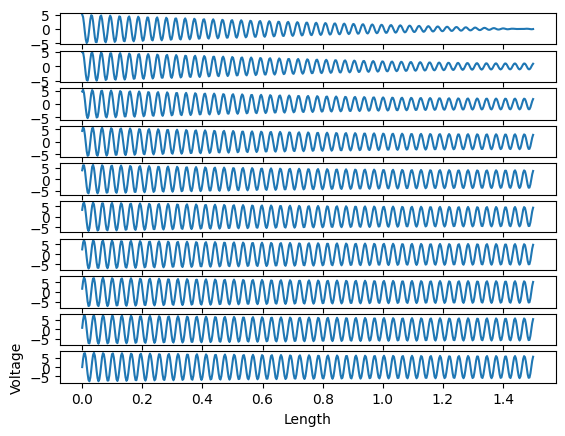

In [18]:
tau = 1/f

zs = np.linspace(0, 1.5, 500)
ts = np.linspace(0, tau/4, 10)

N = len(ts)

for i in range(N):
  plt.subplot(N,1,i+1)
  plt.plot(zs, Vzt(zs, ts[i], w, alpha, beta, Vop, Von))

plt.ylabel('Voltage')
plt.xlabel('Length')

In [19]:
print(Vop)
print(Von)

6.389927703471944
-1.3899277034719437


### Try different $V_0^+$ and $V_0^-$

Text(0.5, 0, 'Length')

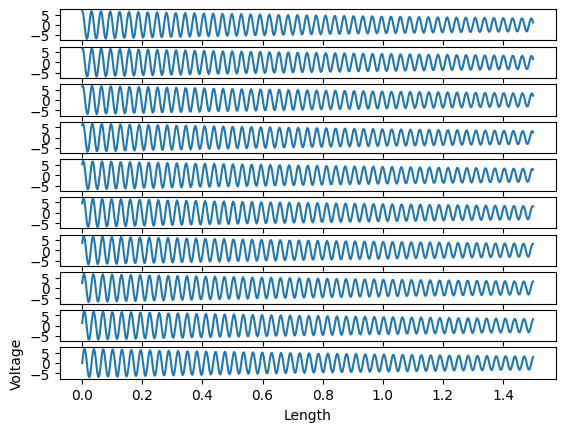

In [20]:
Vop = 7
Von = 0


tau = 1/f

zs = np.linspace(0, 1.5, 500)
ts = np.linspace(0, tau/4, 10)

N = len(ts)

for i in range(N):
  plt.subplot(N,1,i+1)
  plt.plot(zs, Vzt(zs, ts[i], w, alpha, beta, Vop, Von))

plt.ylabel('Voltage')
plt.xlabel('Length')

Text(0.5, 0, 'Length')

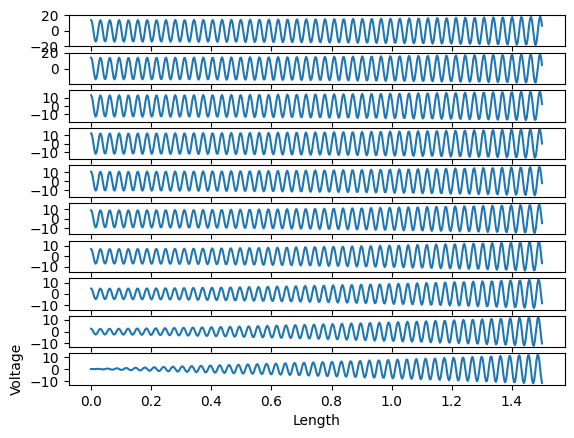

In [21]:
Vop = 7
Von = 7


tau = 1/f

zs = np.linspace(0, 1.5, 500)
ts = np.linspace(0, tau/4, 10)

N = len(ts)

for i in range(N):
  plt.subplot(N,1,i+1)
  plt.plot(zs, Vzt(zs, ts[i], w, alpha, beta, Vop, Von))

plt.ylabel('Voltage')
plt.xlabel('Length')

Text(0.5, 0, 'Length')

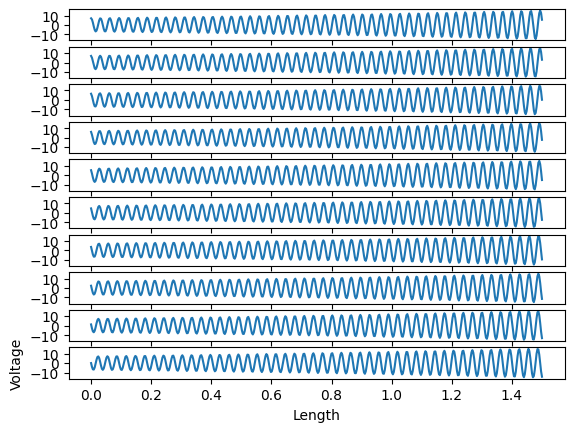

In [22]:
Vop = 0
Von = 7


tau = 1/f

zs = np.linspace(0, 1.5, 500)
ts = np.linspace(0, tau/4, 10)

N = len(ts)

for i in range(N):
  plt.subplot(N,1,i+1)
  plt.plot(zs, Vzt(zs, ts[i], w, alpha, beta, Vop, Von))

plt.ylabel('Voltage')
plt.xlabel('Length')

### Animation

1. Matplotlib animation does not work on Jupyter notebook

2. See [python code](https://github.com/tatpongkatanyukul/Learn/blob/main/antenna/animation2.py)

In [23]:
from matplotlib.animation import FuncAnimation

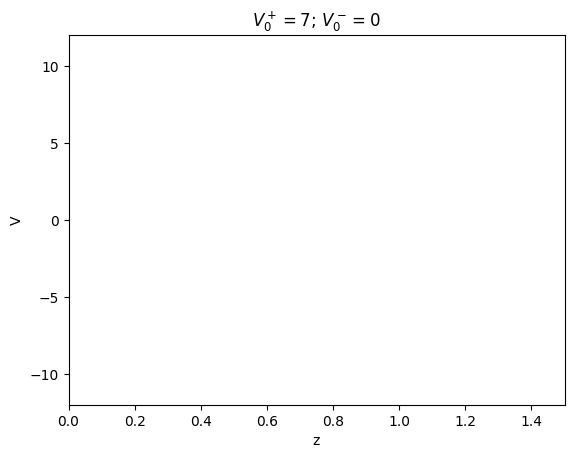

In [24]:
    # Simulation
    R = 2               # ohm/m
    G = 0.5e-3          # siemen/m
    L = 14e-3           # H/m
    C = 3.2e-9          # C/m
    f = 4.8e6           # Hz
    Vop = 7
    Von = 0

    gamma = calc_gamma(R, G, L, C, f)
    alpha = gamma.real
    beta = gamma.imag

    w = 2 * np.pi * f
    tau = 1/f

    # Plot
    fig, ax = plt.subplots()
    xdata, ydata = [], []
    ln, = ax.plot([], [], 'r-')

    ax.set_ylabel('V');
    ax.set_xlabel('z');

    prefix = "$V_0^+ = {}$; $V_0^- = {}$".format(Vop, Von)
    ax.title.set_text(prefix)


    def init():
        ax.set_xlim(0, 1.5)
        ax.set_ylim(-12, 12)
        return ln,

    def update(frame):

        zs = np.linspace(0, 1.5, 1000)
        Vs = Vzt(zs, frame, w, alpha, beta, Vop, Von)

        ax.title.set_text(prefix + ": t = {:e}".format(frame))

        # xdata.append(zs)
        # ydata.append(Vs)
        xdata = zs
        ydata = Vs
        ln.set_data(xdata, ydata)
        return ln,

    ts = np.linspace(0, tau, 20)
    ani = FuncAnimation(fig, update, frames=ts,
                        init_func=init,
                        interval=100, repeat_delay=1000, blit=True)
    plt.show()

In [25]:
from IPython.display import HTML
HTML(ani.to_html5_video())

### 3D Plot

In [26]:
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

In [27]:
N = 30
zs = np.linspace(0, 1.5, N)
ts = np.linspace(0, tau, N)
z, t = np.meshgrid(zs, ts)

v = np.zeros(z.shape)

print(z.shape)
print(t.shape)
print(v.shape)

(30, 30)
(30, 30)
(30, 30)


In [28]:
print("z \in [{:e} , {:e}]".format(np.min(zs), np.max(zs)))
print("t \in [{:e} , {:e}]".format(np.min(ts), np.max(ts)))

z \in [0.000000e+00 , 1.500000e+00]
t \in [0.000000e+00 , 2.083333e-07]


In [29]:
Vop = 7
Von = 0

for i in range(N):
    for j in range(N):
        v[i, j] = Vzt(z[i,j], t[i,j], w, alpha, beta, Vop, Von)


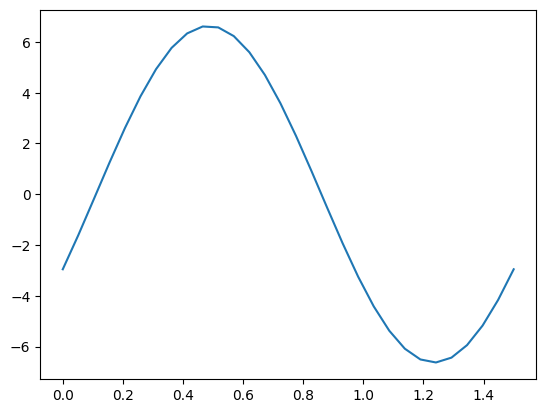

In [30]:
plt.plot(z[0,:], v[:,2])

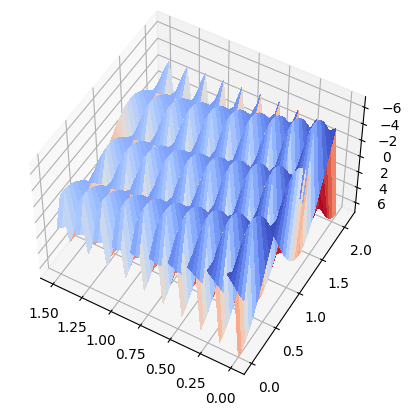

In [31]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(z, t, v, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.view_init(-130, 60)
plt.show()

3D plot is quite difficult to read. I'll better stick to animation.


## Code I(z, t)

In [32]:
def Izt(z, t, w, a, b, Iop, Ion):
    I = Iop * np.exp(-a * z) * np.cos(w * t - b * z) + \
        Ion * np.exp(a * z) * np.cos(w * t + b * z)

    return I

In [33]:
Izt(0, 0, w, alpha, beta, 0.01, 0.01)

0.02

## Characteristic impedance

$\frac{V_0^+}{I_0^+} = Z_0$ is called "characteristic impedance".


Consider the wave equation for forward wave.

* $V(z,t) = V_0^+ e^{-\gamma z} e^{j \omega t}$
* $I(z,t) = I_0^+ e^{-\gamma z} e^{j \omega t}$

Put the forward wave into the Telegrapher's equation #1:
$\frac{d V(z, t)}{d z} + L \frac{d I(z, t)}{d t} + R I(z, t) = 0$,
we get

\begin{align}
-\gamma V_0^+ e^{-\gamma z} e^{j \omega t} &= - j \omega L I_0^+ e^{-\gamma z} e^{j \omega t} - R I_0^+ e^{-\gamma z} e^{j \omega t}
\\
-\gamma V_0^+ &= - j \omega L I_0^+ - R I_0^+
\\
-\gamma V_0^+ &= (- j \omega L - R) I_0^+
\end{align}

Hence,

$\frac{V_0^+}{I_0^+} = \frac{R + j \omega L}{\gamma}$

Recall that
$\gamma = \sqrt{R G - \omega^2 L C + j \omega (L G + R C)}$

\begin{align}
\gamma &= \sqrt{R G - \omega^2 L C + j \omega (L G + R C)}
\\
&= \sqrt{R (G + j \omega C) + j \omega L (G + j \omega C)}
\\
&= \sqrt{(R + j \omega L)  (G + j \omega C)}
\end{align}


Hence,

$\frac{V_0^+}{I_0^+} = \sqrt{\frac{R + j \omega L}{G + j \omega C}} = Z_0$


For lossless transmission line ($R = G = 0$),
$Z_0 = \sqrt{\frac{L}{C}}$ .

In [34]:
def charac_impedance(R, L, G, C, f):
    w = 2 * np.pi * f
    cImp = np.sqrt((R + 1j * w * L)/(G + 1j * w * C))

    return cImp

In [35]:
R = 2               # ohm/m
G = 0.5e-3          # siemen/m
L = 14e-3           # H/m
C = 3.2e-9          # C/m
f = 4.8e6           # Hz

charac_impedance(R, L, G, C, f)

(2091.6290263842925+5.41319178803827j)

Recall that $\alpha = Re\{\gamma\}$
and $\beta = Im\{\gamma\}$

So the lossless propagation constant $\beta  = \omega \sqrt{L C}$

Note $\omega = 2 \pi f = \frac{2 \pi c}{\lambda}$

Wavelenght $\lambda$ (unit: meter) vs period $T$ (unit: second)
* $\lambda = c/f$
* $T = 1/f$




Similar to the forward wave, we can do for backward wave,

\begin{align}
\gamma V_0^- e^{\gamma z} e^{j \omega t} &= - j \omega L I_0^- e^{\gamma z} e^{j \omega t} - R I_0^- e^{\gamma z} e^{j \omega t}
\\
\gamma V_0^- &= - j \omega L I_0^- - R I_0^-
\\
\gamma V_0^- &= (- j \omega L - R) I_0^-
\end{align}

Hence,

$\frac{V_0^-}{I_0^-} = -\sqrt{\frac{R + j \omega L}{G + j \omega C}} = -Z_0$


Recap

$\sqrt{\frac{R + j \omega L}{G + j \omega C}} = Z_0 = \frac{V_0^+}{I_0^+} = - \frac{V_0^-}{I_0^-}$

## Phase velocity

Phase velocity is the velocity of the phase front.

$v_{ph} = \frac{\omega}{\beta}$

* Lossless line $\beta = \omega \sqrt{L C}$, hence $v_{ph}$ is not a function of frequency.

* Lossy line $\beta = f(\omega)$ and $v_{ph} = f'(\omega)$
  * Different frequencies travel at different speed $\Rightarrow$ signal will be distorted.

## Group velocity

Velocity of the envolope of the signal.

See graphics at https://en.wikipedia.org/wiki/Group_velocity

* Single-frequency signal $v_g = v_{ph} = \frac{\omega}{\beta}$.

* Narrow-band signal $v_g = \frac{\partial \omega}{\partial \beta}$

## Lossless transmission line

At $z = \ell$, there is a load $Z_L$ at the terminal.

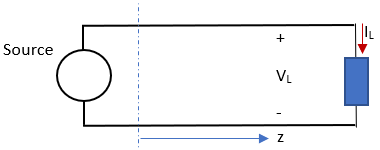

* $Z_0 = \frac{V_0^+}{I_0^+}$

* $Z_L = \frac{V_L}{I_L}$

* If $Z_0 = Z_L$, then
$\frac{V_0^+}{I_0^+} = \frac{V_L}{I_L}$
  * $\Rightarrow$ $V_L = V_0^+ e^{- j \beta \ell}$ and $I_L = I_0^+ e^{- j \beta \ell}$

* If $Z_0 \neq Z_L$, then
$\frac{V_0^+}{I_0^+} \neq \frac{V_L}{I_L}$
  * $\Rightarrow$ $V_L = V_0^+ e^{- j \beta \ell} + V_0^- e^{j \beta \ell}$ and $I_L = I_0^+ e^{- j \beta \ell} + I_0^- e^{j \beta \ell}$

With

* $Z_L = \frac{V_L}{I_L} = \frac{V_0^+ e^{-j \beta \ell} + V_0^- e^{j \beta \ell}}{I_0^+ e^{-j \beta \ell} + I_0^- e^{j \beta \ell}}$  ... (1)

* $Z_0 = \frac{V_0^+}{I_0^+} = - \frac{V_0^-}{I_0^-}$ ... (2)

we can derive

* $I_0^+ = \frac{V_0^+}{Z_0}$  ... (3a)

* $I_0^- = - \frac{V_0^-}{Z_0}$  ... (3b)

Substitute (3a) and (3b) into (1), we get

$Z_L = \frac{V_0^+ e^{-j \beta \ell} + V_0^- e^{j \beta \ell}}{ \frac{V_0^+}{Z_0} e^{-j \beta \ell} - \frac{V_0^-}{Z_0} e^{j \beta \ell}}$

= $\frac{Z_0 V_0^+ e^{-j \beta \ell} + Z_0 V_0^- e^{j \beta \ell}}{ V_0^+ e^{-j \beta \ell} - V_0^- e^{j \beta \ell}}$

\begin{align}
Z_L V_0^+ e^{-j \beta \ell} - Z_L V_0^- e^{j \beta \ell} &= Z_0 V_0^+ e^{-j \beta \ell} + Z_0 V_0^- e^{j \beta \ell}
\\
Z_L V_0^+ e^{-j \beta \ell} - Z_0 V_0^+ e^{-j \beta \ell}
&= Z_L V_0^- e^{j \beta \ell} + Z_0 V_0^- e^{j \beta \ell}
\\
(Z_L e^{-j \beta \ell} - Z_0 e^{-j \beta \ell}) V_0^+
&= (Z_L e^{j \beta \ell} + Z_0 e^{j \beta \ell}) V_0^-
\end{align}

$$\frac{V_0^-}{V_0^+} = \frac{Z_L e^{-j \beta \ell} - Z_0 e^{-j \beta \ell}}{Z_L e^{j \beta \ell} + Z_0 e^{j \beta \ell}}$$

Suppose $\ell = 0$ (at the source terminals), we get

$$\frac{V_0^-}{V_0^+} = \frac{Z_L - Z_0}{Z_L + Z_0}$$

Define $\Gamma \equiv \frac{V_0^-}{V_0^+} = \frac{Z_L - Z_0}{Z_L + Z_0}$.

* $V_0^+$ : input voltage
* $V_0^-$ : reflection voltage
* $\Gamma$ : "the reflection coefficient"

Hence, $V_0^- = V_0^+ \Gamma$.

This $V_0^-$ reflects back from the load toward the source.

Only $V_0^+ (1 - \Gamma)$ the remainder of the signal is absorbed at the load. (because it is lossless transmission line.)

So to maximize power transfered to the load, we minimize $\Gamma$ (, i.e., making $Z_L = Z_0$.)

* Case I : $Z_L = Z_0$
  * $\Gamma = 0 \Rightarrow V_0^- = 0$ : Nothing is reflected. All flow into the load.

* Case II : $Z_L = \infty$ (o.c.)
  * $\Gamma = 1 \Rightarrow$ All are reflected back. Nothing is absorbed at the load.

* Case III : $Z_L = 0$ (s.c.)
  * $\Gamma = -1 \Rightarrow V_0^- = - V_0^+$ : All are reflected back with phase shift 180 degree.

### Simulation of different loads

1. $V_0^+$ and $V_0^-$ reveal $Z_L$

2. Given

  * Initial condition: $V(t_0, z_0) = V_0^+ \cos(\omega t_0 - \beta z_0) + V_0^- \cos(\omega t_0 + \beta z_0)$

  * Load condition: $\frac{V_0^-}{V_0^+} = \frac{Z_L e^{- j \beta \ell} - Z_0 e^{-j \beta \ell}}{Z_L e^{j \beta \ell} + Z_0 e^{j \beta \ell}}$ or $0 = V_0^+ \frac{Z_L e^{- j \beta \ell} - Z_0 e^{-j \beta \ell}}{Z_L e^{j \beta \ell} + Z_0 e^{j \beta \ell}} - V_0^-$

  Recall that this formation obtained by having $\alpha = 0$ or it is for lossless transmission line ($R = G = 0$)

In [45]:
def solveVC(V0, t0, z0, ZL, ell, Zo, a, b, w):
    assert a == 0, "It must be lossless transmission line."

    bv = np.array([[V0], [0]])

    T1 = np.exp(-1j * b * ell)
    T2 = np.exp(1j * b * ell)
    Am = np.array([[np.cos(w*t0 - b*z0),
                    np.cos(w*t0 + b*z0)],
                   [(ZL*T1 - Zo*T1)/(ZL*T2 + Zo*T2),
                    -1]])

    # If it is singular, let it break!
    #
    # detA = np.linalg.det(Am)
    # # print('det =', detA)

    # tol = 1e-12
    # eps = 1e-13
    # if np.abs(detA) < tol:
    #     Am[1,0] += 1e-13

    VC = np.linalg.solve(Am, bv)
    return VC[0,0], VC[1,0]

It is possible that arbitrary choice of initial condition could contradict the load condition.

E.g.,

Source-terminal voltage $V(0, 0) = V_0$ and short-circuit load ($Z_L = 0$).

This leads to:
\begin{align}
V_0 &= V_0^+ + V_0^-
\\
0 &= V_0^+ \frac{- Z_0 e^{-j \beta \ell}}{Z_0 e^{j \beta \ell}} - V_0^-
\end{align}

That is,
\begin{align}
V_0 &= V_0^+  + V_0^-
\\
0 &= V_0^+ + V_0^-
\end{align}

If $V_0 \neq 0$, the initial condition contradicts the load condition.

Note: this kind of contradiction would not happen in practice,
since this initial condition will not happen in the first place. (I guess! ... interesting, mm!)




#### S.C.

we can avoid this situation by having the initial condition away from the source terminal $z \neq 0$.

That is,
\begin{align}
V_0 &= V_0^+ \cos(\omega t_0 - \beta z_0) + V_0^- \cos(\omega t_0 + \beta z_0)
\\
0 &= V_0^+ + V_0^-
\end{align}

alpha = 0.0 ; beta = 201.86457545561802
Zo = 2.091650e+03+0.000000e+00j ; ZL = 1.000000e+20
* Expect V- ~V+
V+ = 2.172626e+00+0.000000e+00j ; V- = 2.172626e+00+0.000000e+00j


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


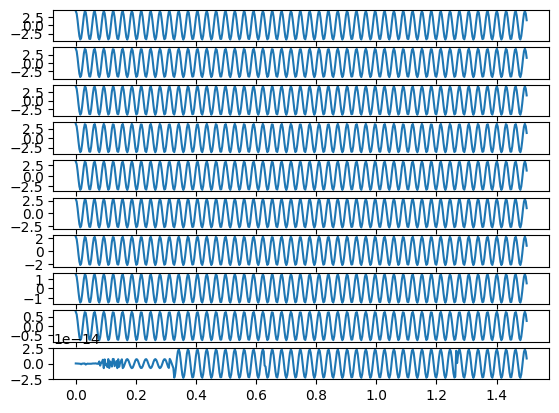

In [65]:
    # Simulation
    R = 0 #2               # ohm/m
    G = 0 # 0.5e-3          # siemen/m
    # Lossless condition

    L = 14e-3           # H/m
    C = 3.2e-9          # C/m
    f = 4.8e6           # Hz

    gamma = calc_gamma(R, G, L, C, f)
    alpha = gamma.real
    beta = gamma.imag

    print('alpha =', alpha, '; beta =', beta)

    w = 2 * np.pi * f
    tau = 1/f

    # Initial condition
    V0, t0, z0 = 4, 0.1, 0.5    # close to source-terminal at t=0.1.
                              # Avoid contradiction at s.c.
                              # cos ~ even fn. so t0 != 0 and z0 != 0

    # Load, t', length
    Zo = charac_impedance(R, L, G, C, f)

    ell = 0 #1.5  #0
    # ZL = 0     # S.C.
    # ZL = Zo    # Matching
    ZL = 1e20  # O.C.

    print("Zo = {:e} ; ZL = {:e}".format(Zo, ZL))
    msg = ""
    if ZL == Zo:
        msg = "* Expect V- ~0"
    elif ZL > 1e12:
        msg = "* Expect V- ~V+"
    elif ZL < 1e-12:
        msg = "* Expect V- ~ -V+"
    print(msg)


    # Solve for V+, V-
    Vop, Von = solveVC(V0, t0, z0, ZL, ell, Zo, alpha, beta, w)

    print("V+ = {:e} ; V- = {:e}".format(Vop, Von))

    zs = np.linspace(0, 1.5, 500)
    ts = np.linspace(0, tau/4, 10)

    N = len(ts)

    for i in range(N):
        vz = Vzt(zs, ts[i], w, alpha, beta, Vop, Von)

        plt.subplot(N,1,1*i+1);
        plt.plot(zs, vz);

#### Code ```complex_Vzt```

In [66]:
def complex_Vzt(z, t, w, gamma, Vop, Von):
    V = (Vop * np.exp(-gamma * z) + Von * np.exp(gamma * z)) * \
        np.exp(1j * w * t)

    return V

alpha = 0.0 ; beta = 201.86457545561802
Zo = 2.091650e+03+0.000000e+00j ; ZL = 4.183300e+03+0.000000e+00j

Reflection coefficient = (0.33333333333333337+0j)
SWR = 2.0000000000000004

V+ = 3.258939e+00+0.000000e+00j ; V- = 1.086313e+00+0.000000e+00j


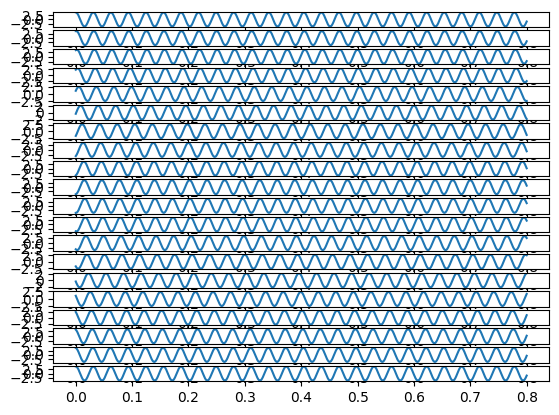

In [124]:
    # Simulation
    R = 0 #2               # ohm/m
    G = 0 # 0.5e-3          # siemen/m
    # Lossless condition

    L = 14e-3           # H/m
    C = 3.2e-9          # C/m
    f = 4.8e6           # Hz

    gamma = calc_gamma(R, G, L, C, f)
    alpha = gamma.real
    beta = gamma.imag

    print('alpha =', alpha, '; beta =', beta)

    w = 2 * np.pi * f
    tau = 1/f

    # Initial condition
    V0, t0, z0 = 4, 0.1, 0.5    # close to source-terminal at t=0.1.
                              # Avoid contradiction at s.c.
                              # cos ~ even fn. so t0 != 0 and z0 != 0

    # Load, t', length
    Zo = charac_impedance(R, L, G, C, f)

    ell = 0 #1.5  #0
    # ZL = 0     # S.C.
    # ZL = Zo/2    # Under
    # ZL = Zo    # Matching
    ZL = 2*Zo    # Over
    # ZL = 1e20  # O.C.

    print("Zo = {:e} ; ZL = {:e}".format(Zo, ZL))
    msg = ""
    if ZL == Zo:
        msg = "* Expect V- ~0"
    elif ZL > 1e12:
        msg = "* Expect V- ~V+"
    elif ZL < 1e-12:
        msg = "* Expect V- ~ -V+"
    print(msg)

    # Reflection coefficient

    R_coeff = (ZL - Zo)/(ZL + Zo)
    print('Reflection coefficient =', R_coeff)

    ARC = np.abs(R_coeff)
    SWR = (1 + ARC)/(1 - ARC);
    print('SWR =', SWR)

    # Solve for V+, V-
    Vop, Von = solveVC(V0, t0, z0, ZL, ell, Zo, alpha, beta, w)

    print("\nV+ = {:e} ; V- = {:e}".format(Vop, Von))

    zs = np.linspace(0, 0.8, 500)
    ts = np.linspace(0, tau, 20)

    N = len(ts)

    for i in range(N):
        vz = complex_Vzt(zs, ts[i], w, gamma, Vop, Von)

        plt.subplot(N,1,1*i+1);
        plt.plot(zs, vz.real);

In [126]:
np.max(vz.real)

4.345251711326464

### Animation

In [78]:
from matplotlib.animation import FuncAnimation

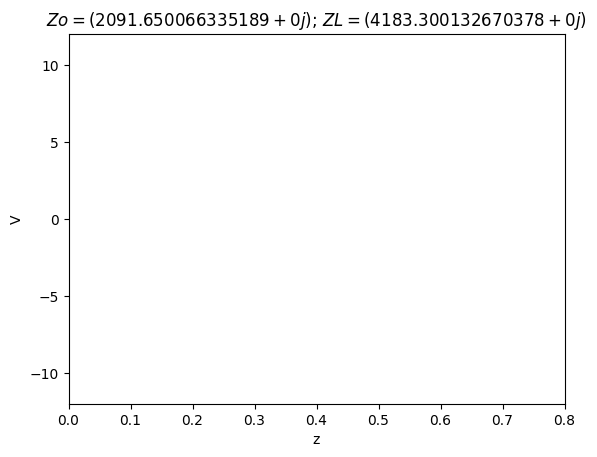

In [127]:
    # Plot
    fig, ax = plt.subplots()
    xdata, ydata = [], []
    ln, = ax.plot([], [], 'r-')

    ax.set_ylabel('V');
    ax.set_xlabel('z');

    prefix = "$Zo = {}$; $ZL = {}$".format(Zo, ZL)
    ax.title.set_text(prefix)


    def init():
        ax.set_xlim(0, 0.8)
        # ax.set_ylim(-4e11, 4e11)
        ax.set_ylim(-12, 12)
        return ln,

    def update(frame):

        ti = frame
        zs = np.linspace(0, 0.8, 1000)
        Vs = complex_Vzt(zs, ti, w, gamma, Vop, Von)

        ax.title.set_text(prefix + ": t = {:e}".format(frame))

        # xdata.append(zs)
        # ydata.append(Vs)
        xdata = zs
        ydata = Vs.real
        ln.set_data(xdata, ydata)
        return ln,

    ts = np.linspace(0, 10*tau, 200)
    ani = FuncAnimation(fig, update, frames=ts,
                        init_func=init,
                        interval=100, repeat_delay=1000, blit=True)
    plt.show()

In [128]:
from IPython.display import HTML
HTML(ani.to_html5_video())

Lossless $Z_0 = \sqrt{\frac{L}{C}}$

(This is positive and purely real.)


If the load is passive, i.e., $Re\{ Z_L \} \geq 0$, then
$$\Gamma = \frac{Z_L - Z_0}{Z_L + Z_0}$$

Note $| \Gamma | \leq 1$.

Standing Wave Ratio (SWR)

$$SWR = \frac{1 + | \Gamma |}{1 - | \Gamma |}$$

Return loss (RL, in dB)

$$RL = -20 \log_{10} | \Gamma | $$

Text(0, 0.5, 'RL')

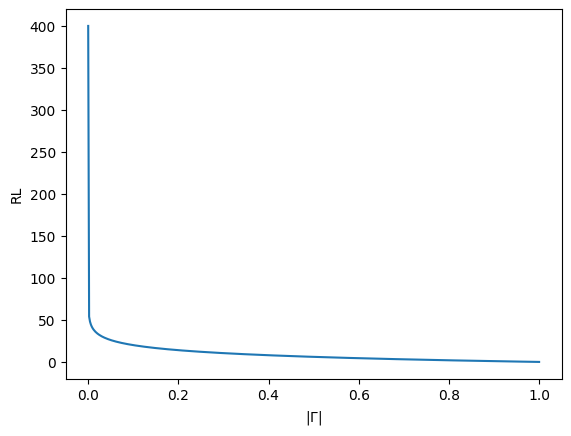

In [135]:
aGamma = np.linspace(1e-20, 1, 500)

RL = lambda ag : -20 * np.log10(ag)

plt.plot(aGamma, RL(aGamma))
plt.xlabel('$|\Gamma|$')
plt.ylabel('RL')


"Thus, a large positive return loss indicates the reflected power is small relative to the incident power, which indicates good impedance match between transmission line and load."

https://en.wikipedia.org/wiki/Return_los

## Lossy transmission line

Lossy transmission line $\alpha \neq 0$.

Similar to lossless case, we can have

\begin{align}
\frac{V_0^-}{V_0^+} = \frac{Z_L e^{- \gamma \ell} - Z_0 e^{- \gamma \ell}}{Z_L e^{ \gamma \ell} + Z_0 e^{ \gamma \ell}}
\end{align}

Hence,

  * Initial condition: $V(t_0, z_0) = V_0^+ e^{-\alpha z_0} \cos(\omega t_0 - \beta z_0) + V_0^- e^{\alpha z_0} \cos(\omega t_0 + \beta z_0)$

  * Load condition: $0 = V_0^+ \frac{Z_L e^{- \gamma \ell} - Z_0 e^{- \gamma \ell}}{Z_L e^{\gamma \ell} + Z_0 e^{\gamma \ell}} - V_0^-$

  The initial condition has to be in time-domain form (vs complex form), since it has be measureable.

In [136]:
def solveVC_lossy(V0, t0, z0, ZL, ell, Zo, a, b, w):

    bv = np.array([[V0], [0]])

    T1 = np.exp(-(a + 1j * b) * ell)
    T2 = np.exp((a + 1j * b) * ell)
    Am = np.array([[np.exp(-a * z0)*np.cos(w*t0 - b*z0),
                    np.exp(a * z0)*np.cos(w*t0 + b*z0)],
                   [(ZL*T1 - Zo*T1)/(ZL*T2 + Zo*T2),
                    -1]])

    VC = np.linalg.solve(Am, bv)
    return VC[0,0], VC[1,0]

### Simulation

alpha = 0.5233888552202206 ; beta = 201.8652514916093
Zo = 2.091629e+03+5.413192e+00j ; ZL = 0.000000e+00
* Expect V- ~ -V+
Reflection coefficient = (-1+0j)
SWR = inf

V+ = 3.303468e+00-8.495428e-01j ; V- = 1.387886e+00+5.033620e-01j


<ipython-input-155-3e28b0c30891>:49: RuntimeWarning: divide by zero encountered in double_scalars
  SWR = (1 + ARC)/(1 - ARC);


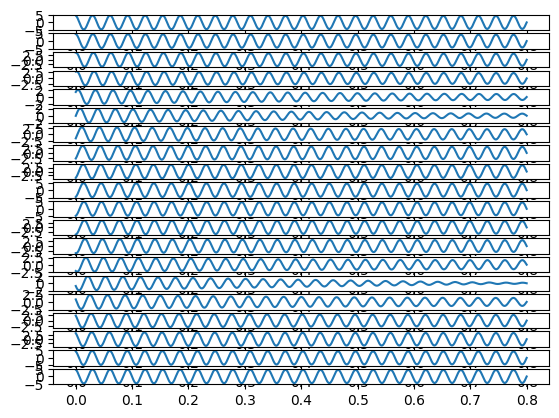

In [155]:
    # Simulation
    R = 2               # ohm/m
    G = 0.5e-3          # siemen/m

    L = 14e-3           # H/m
    C = 3.2e-9          # C/m
    f = 4.8e6           # Hz

    gamma = calc_gamma(R, G, L, C, f)
    alpha = gamma.real
    beta = gamma.imag

    print('alpha =', alpha, '; beta =', beta)

    w = 2 * np.pi * f
    tau = 1/f

    # Initial condition
    V0, t0, z0 = 4, 0.1, 0.5    # close to source-terminal at t=0.1.
                              # Avoid contradiction at s.c.
                              # cos ~ even fn. so t0 != 0 and z0 != 0

    # Load, t', length
    Zo = charac_impedance(R, L, G, C, f)

    ell = 0.8 #1.5  #0
    ZL = 0     # S.C.
    # ZL = Zo/2    # Under
    # ZL = Zo    # Matching
    # ZL = 2*Zo    # Over
    # ZL = 1e20  # O.C.

    print("Zo = {:e} ; ZL = {:e}".format(Zo, ZL))
    msg = ""
    if ZL == Zo:
        msg = "* Expect V- ~0"
    elif ZL > 1e12:
        msg = "* Expect V- ~V+"
    elif ZL < 1e-12:
        msg = "* Expect V- ~ -V+"
    print(msg)

    # Reflection coefficient

    R_coeff = (ZL - Zo)/(ZL + Zo)
    print('Reflection coefficient =', R_coeff)

    ARC = np.abs(R_coeff)
    SWR = (1 + ARC)/(1 - ARC);
    print('SWR =', SWR)

    # Solve for V+, V-
    Vop, Von = solveVC_lossy(V0, t0, z0, ZL, ell, Zo, alpha, beta, w)

    print("\nV+ = {:e} ; V- = {:e}".format(Vop, Von))

    zs = np.linspace(0, 0.8, 500)
    ts = np.linspace(0, tau, 20)

    N = len(ts)

    for i in range(N):
        vz = complex_Vzt(zs, ts[i], w, gamma, Vop, Von)

        plt.subplot(N,1,1*i+1);
        plt.plot(zs, vz.real);

In [156]:
np.max(vz.real)

4.822811436547237

### Animation

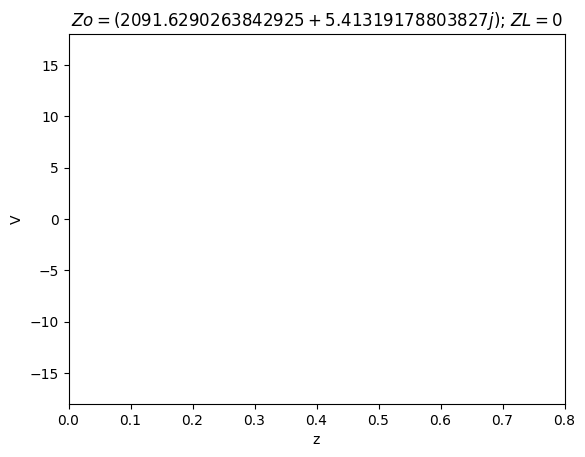

In [157]:
    # Plot
    fig, ax = plt.subplots()
    xdata, ydata = [], []
    ln, = ax.plot([], [], 'r-')

    ax.set_ylabel('V');
    ax.set_xlabel('z');

    prefix = "$Zo = {}$; $ZL = {}$".format(Zo, ZL)
    ax.title.set_text(prefix)


    def init():
        ax.set_xlim(0, 0.8)
        # ax.set_ylim(-4e11, 4e11)
        ax.set_ylim(-18, 18)
        return ln,

    def update(frame):

        ti = frame
        zs = np.linspace(0, 0.8, 1000)
        Vs = complex_Vzt(zs, ti, w, gamma, Vop, Von)

        ax.title.set_text(prefix + ": t = {:e}".format(frame))

        # xdata.append(zs)
        # ydata.append(Vs)
        xdata = zs
        ydata = Vs.real
        ln.set_data(xdata, ydata)
        return ln,

    ts = np.linspace(0, 10*tau, 200)
    ani = FuncAnimation(fig, update, frames=ts,
                        init_func=init,
                        interval=100, repeat_delay=1000, blit=True)
    plt.show()

In [158]:
from IPython.display import HTML
HTML(ani.to_html5_video())

# End